<a href="https://colab.research.google.com/github/Molla80/Tensorflow/blob/master/Lending_Club_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as tm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving lending_club.csv to lending_club.csv


In [0]:
import io
df2 = tm.read_csv(io.BytesIO(uploaded['lending_club.csv']))

In [0]:
#dummy = tm.get_dummies(df2['loan_status'],drop_first=True)

In [5]:
df2['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [0]:
df2['loan_repaid'] = df2['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [0]:
df2 = df2.drop('loan_status',axis=1)

In [8]:
df2['loan_repaid'].isnull().sum()

0

Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df2.drop('loan_repaid',axis=1)
y = df2['loan_repaid']

In [11]:
print(np.any(np.isnan(y)))

False


In [0]:
print(np.any(np.isnan(X)))

False


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [17]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y)))

False
False


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [0]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=3)

In [0]:
pwd

'/content'

In [0]:
log_directory = '/root/logs/fit'
borad = TensorBoard(log_dir='log_directory',histogram_freq=1,write_graph=True,write_images=True,update_freq='epoch',profile_batch=2, embeddings_freq=1)

In [0]:
model = Sequential()
model.add(Dense(78,activation='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
#lstm_layer = LSTM(79,return_sequences=True, activation='linear')
#lstm_layer.add_loss('L2 weight regularization')

model.compile(optimizer=Adam(lr=1e-2, clipnorm=1),loss='binary_crossentropy')

In [23]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stop])

Epoch 1/100
9881/9881 [==============================] - 24s 2ms/step - loss: 0.2739 - val_loss: 0.2655
Epoch 2/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.2684 - val_loss: 0.2688
Epoch 3/100
9881/9881 [==============================] - 20s 2ms/step - loss: 0.2683 - val_loss: 0.2665
Epoch 4/100
9881/9881 [==============================] - 20s 2ms/step - loss: 0.2683 - val_loss: 0.2715
Epoch 00004: early stopping


In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('lending_club_model_1.h5')

Evaluating model performance

In [0]:
losses = tm.DataFrame(model.history.history)

<Figure size 576x432 with 0 Axes>

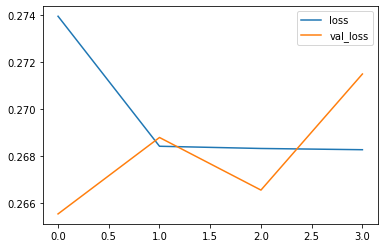

In [25]:
plt.figure(figsize=(8,6))
losses[['loss','val_loss']].plot()

Predictions

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
predix = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
print(classification_report(y_test,predix))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [29]:
print(confusion_matrix(y_test,predix))

[[ 6720  8938]
 [    0 63386]]


New customer evaluation

In [30]:
import random
random.seed(101)
random_ind = random.randint(0,len(df2))

new_customer = df2.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

Unnamed: 0          305323.00
loan_amnt            25000.00
term                    60.00
int_rate                18.24
installment            638.11
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      1996.00
Name: 304691, Length: 79, dtype: float64

In [32]:
model.predict_classes(new_customer.values.reshape(1,79))

array([[1]], dtype=int32)

In [33]:
df2.iloc[random_ind]['loan_repaid']

1.0